In [1]:
#包导入及设置

In [2]:
import pynlpir as pynlpir

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()

In [4]:
%matplotlib inline

In [5]:
#中文显示字体设置
from matplotlib.font_manager import FontProperties
font=FontProperties(fname=r'c:\windows\fonts\simhei.ttf',size=15)

In [6]:
#数据读入

In [7]:
text=open('2017.txt','r').read().replace('\n','')
#查看已读入数据
text[0:150]

'主持人：中国中央电视台！主持人：中国中央电视台！主持人：此刻我们在北京中央电视台一号演播大厅向全球现场直播《2017年春节联欢晚会》。主持人：春回大地百花艳，节至人间万象新，一年一度的春节联欢晚会又一次如约而至。主持人：连续举办34年的央视春晚，已经成为伴随13亿中华儿女和全球华人辞旧迎新的新年俗。'

In [8]:
#分词处理

In [9]:
#打开分词器
pynlpir.open()

In [10]:
pynlpir.segment(text,pos_names='parent',pos_english=False)[:20]

[('主持人', '名词'),
 ('：', '标点符号'),
 ('中国', '名词'),
 ('中央电视台', '复合语'),
 ('！', '标点符号'),
 ('主持人', '名词'),
 ('：', '标点符号'),
 ('中国', '名词'),
 ('中央电视台', '复合语'),
 ('！', '标点符号'),
 ('主持人', '名词'),
 ('：', '标点符号'),
 ('此刻', '代词'),
 ('我们', '代词'),
 ('在', '介词'),
 ('北京', '名词'),
 ('中央电视台', '复合语'),
 ('一', '数词'),
 ('号', '量词'),
 ('演播', '动词')]

In [11]:
#自定义词汇

In [12]:
pynlpir.nlpir.AddUserWord('央视'.encode('utf8'),'noun')
pynlpir.nlpir.AddUserWord('主持人：'.encode('utf8'),'noun')
pynlpir.nlpir.AddUserWord('观众朋友们'.encode('utf8'),'noun')
pynlpir.nlpir.AddUserWord('春联'.encode('utf8'),'noun')
pynlpir.nlpir.AddUserWord('一号演播大厅'.encode('utf8'),'noun')
pynlpir.nlpir.AddUserWord('综合频道'.encode('utf8'),'noun')
pynlpir.nlpir.AddUserWord('综艺频道'.encode('utf8'),'noun')
pynlpir.nlpir.AddUserWord('中文国际频道'.encode('utf8'),'noun')
pynlpir.nlpir.AddUserWord('军事农业频道'.encode('utf8'),'noun')
pynlpir.nlpir.AddUserWord('少儿频道'.encode('utf8'),'noun')

1

In [13]:
pynlpir.segment(text,pos_names='parent',pos_english=False)[:20]

[('主持人：', '名词'),
 ('中国', '名词'),
 ('中央电视台', '复合语'),
 ('！', '标点符号'),
 ('主持人：', '名词'),
 ('中国', '名词'),
 ('中央电视台', '复合语'),
 ('！', '标点符号'),
 ('主持人：', '名词'),
 ('此刻', '代词'),
 ('我们', '代词'),
 ('在', '介词'),
 ('北京', '名词'),
 ('中央电视台', '复合语'),
 ('一号演播大厅', '名词'),
 ('向', '介词'),
 ('全球', '名词'),
 ('现场', '处所词'),
 ('直播', '动词'),
 ('《', '标点符号')]

In [14]:
#现在对2017年春晚主持词数据进行分词，并追加至一个新的列表words

#学会先定义一个空结构，然后补充的思路
words=[]
year=2017
year_words=[]
year_words.extend(pynlpir.segment(text,pos_names='parent',pos_english=False))

#由于这里的year_words是[元组]，无法修改，将其转换成【列表】
for i in range(len(year_words)):
    ls_year_words=list(year_words[i])
    ls_year_words.append(year)
    words.append(ls_year_words)
    
words[:13]

[['主持人：', '名词', 2017],
 ['中国', '名词', 2017],
 ['中央电视台', '复合语', 2017],
 ['！', '标点符号', 2017],
 ['主持人：', '名词', 2017],
 ['中国', '名词', 2017],
 ['中央电视台', '复合语', 2017],
 ['！', '标点符号', 2017],
 ['主持人：', '名词', 2017],
 ['此刻', '代词', 2017],
 ['我们', '代词', 2017],
 ['在', '介词', 2017],
 ['北京', '名词', 2017]]

In [15]:
#将列表words转换成数据框df_words
df_words=pd.DataFrame(words,columns=['词汇','词性','年份'])
df_words.head(25)

,词汇,词性,年份
0,主持人：,名词,2017
1,中国,名词,2017
2,中央电视台,复合语,2017
3,！,标点符号,2017
4,主持人：,名词,2017
5,中国,名词,2017
6,中央电视台,复合语,2017
7,！,标点符号,2017
8,主持人：,名词,2017
9,此刻,代词,2017


In [16]:
df_words.index.size

6473

In [17]:
#停用词的处理

In [18]:
stopwords=open('stopwords.txt').read()
stopwords[:20]

'主持人:\n主持人：\n主持词\n(\n（\n？\n'

In [19]:
#过滤停用词

for i in range(df_words.shape[0]):
    if(df_words.词汇[i] in stopwords):
        df_words.drop(i,inplace=True)
    
    else:
        pass

In [20]:
df_words.head(15)

,词汇,词性,年份
1,中国,名词,2017
2,中央电视台,复合语,2017
5,中国,名词,2017
6,中央电视台,复合语,2017
9,此刻,代词,2017
10,我们,代词,2017
12,北京,名词,2017
13,中央电视台,复合语,2017
14,一号演播大厅,名词,2017
15,向,介词,2017


In [21]:
df_words.shape

(3976, 3)

In [22]:
#词性分布分析

In [23]:
#统计2017央视春晚主持人的词性分布
df_WordSpeechDistribution=pd.DataFrame(df_words['词性'].value_counts(ascending=False))
#valuecount的主要功能就是计数并按降序排序
df_WordSpeechDistribution.head(10)

,词性
名词,1248
动词,963
代词,315
形容词,266
副词,213
量词,199
时间词,181
数词,180
介词,94
方位词,65


In [24]:
df_WordSpeechDistribution.rename(columns={'词性':'频数'},inplace=True)

df_WordSpeechDistribution.head()

,频数
名词,1248
动词,963
代词,315
形容词,266
副词,213


In [25]:
df_WordSpeechDistribution['频数'].sum()

3976

In [26]:
df_WordSpeechDistribution['百分比']=df_WordSpeechDistribution['频数']/df_WordSpeechDistribution['频数'].sum()
df_WordSpeechDistribution.head(10)

,频数,百分比
名词,1248,0.313883
动词,963,0.242203
代词,315,0.079225
形容词,266,0.066901
副词,213,0.053571
量词,199,0.050050
时间词,181,0.045523
数词,180,0.045272
介词,94,0.023642
方位词,65,0.016348


In [27]:
df_WordSpeechDistribution.shape

(22, 2)

Text(0.5, 1.0, '2017央视春晚主持人【主持词】词性分布分析')

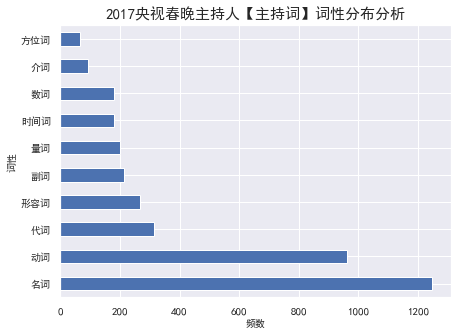

In [28]:
#绘制前10位词性类别分布图
plt.rcParams["font.family"]='simHei'
plt.subplots(figsize=(7,5))
df_WordSpeechDistribution.iloc[:10]['频数'].plot(kind='barh')
plt.yticks(fontproperties=font,size=10)
plt.xlabel('频数',fontproperties=font,size=10)
plt.ylabel('词性',fontproperties=font,size=10)
plt.title('2017央视春晚主持人【主持词】词性分布分析',fontproperties=font)

In [29]:
#高频词分析

In [30]:
columns_selected=['动词','动词计数','名词','名词计数','代词','代词计数','助词','助词计数','副词','副词计数','形容词','形容词计数']

df_Top6=pd.DataFrame(columns=columns_selected)

for i in range(0,12,2):
    df_Top6[columns_selected[i]]=df_words.loc[df_words['词性']==columns_selected[i]]['词汇'].value_counts().reset_index()['index']
    df_Top6[columns_selected[i+1]]=df_words.loc[df_words['词性']==columns_selected[i]]['词汇'].value_counts().reset_index()['词汇']
    
df_Top6.head(16)

,动词,动词计数,名词,名词计数,代词,代词计数,助词,助词计数,副词,副词计数,形容词,形容词计数
0,要,23,中国,27,我们,100.0,着,16.0,不,22.0,好,23.0
1,到,22,福,27,我,34.0,过,12.0,最,13.0,新,19.0
2,请,20,朋友,22,这,32.0,之,11.0,更,12.0,大,15.0
3,来,18,观众,18,大家,23.0,得,10.0,就,11.0,老,11.0
4,看,14,航天员,17,你,16.0,地,5.0,正,9.0,幸运,11.0
5,说,14,观众朋友们,17,您,9.0,连,1.0,还,9.0,伟大,10.0
6,感谢,12,字,14,此刻,8.0,等,1.0,再,8.0,欢乐,9.0
7,带,11,神,14,各族,7.0,NaN,NaN,将,8.0,美好,6.0
8,会,10,全国,14,这里,7.0,NaN,NaN,正在,7.0,深,5.0
9,花,9,舟,14,每,7.0,NaN,NaN,又,7.0,多,4.0


In [31]:
#词频统计

In [32]:
df_words.head()

,词汇,词性,年份
1,中国,名词,2017
2,中央电视台,复合语,2017
5,中国,名词,2017
6,中央电视台,复合语,2017
9,此刻,代词,2017


In [33]:
#只保留两列作为数据框AnnaulWords
df_AnnualWords=df_words[["年份","词汇"]].pivot(columns="年份",values="词汇")
df_AnnualWords.head()

年份,2017
1,中国
2,中央电视台
5,中国
6,中央电视台
9,此刻


In [34]:
df_AnnualWords.fillna(0,inplace=True)

df_AnnualWords.head()

年份,2017
1,中国
2,中央电视台
5,中国
6,中央电视台
9,此刻


In [35]:
df_AnnualTopWords=pd.DataFrame(columns=[2017])

df_AnnualTopWords[2017]=df_AnnualWords[2017].value_counts().reset_index()["index"]

df_AnnualTopWords[1:].head(20)

,2017
1,我
2,春
3,这
4,们
5,年
6,福
7,中国
8,好
9,大家
10,要


In [36]:
#关键词分析

In [37]:
df_annual_keywords=pd.DataFrame(columns=[2017])

df_annual_keywords[2017]=pynlpir.get_key_words(' '.join(df_AnnualTopWords[2017].astype('str')))

df_annual_keywords.head(10)

,2017
0,@春晚
1,姜昆
2,杨利伟
3,中国
4,世界
5,人心
6,观众朋友们
7,央视
8,传祺
9,央视网


In [38]:
#生成词云

In [39]:
from wordcloud import WordCloud
from imageio import imread

font_wc=r'C:\Windows\Fonts\msyhbd.ttc'

In [40]:
myText=' '.join(df_words.词汇)
myText[:20]

'中国 中央电视台 中国 中央电视台 此刻'

In [41]:
#读入背景图片

bg_pic=imread('host2.jpg')

wc=WordCloud(font_path=font_wc,mask=bg_pic,max_words=500,max_font_size=200,
                        background_color='white',colormap='Reds_r',scale=15.5)

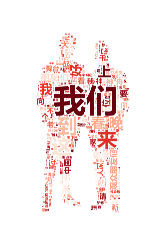

In [42]:
#生成词云----generate()
wc.generate(myText)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [43]:
wc.to_file('chun.jpg')

In [44]:
pynlpir.close()

In [45]:
#人脸识别与图像上识别

In [46]:
import cv2

In [47]:
image=cv2.imread("test.jpg")

In [48]:
#将RGB图像转换成灰度图

In [49]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imshow("Showing gray image",gray)
cv2.waitKey(0)

-1

In [50]:
#人脸识别与矩阵标识

In [51]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces=faceCascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5,minSize=(30,30))
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),8)

In [52]:
cv2.imshow("Window Name",image)
cv2.waitKey(0)

-1

In [53]:
cv2.imwrite("test_fr.png",image)

True